In [18]:
# Import Pandas for data manipulation
import pandas as pd
# Import NumPy for numerical operations
import numpy as np
# For composing transformers for different data types
from sklearn.compose import make_column_transformer
# For building a machine learning pipeline
from sklearn.pipeline import Pipeline
# For preprocessing data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# For using a Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
# For using a Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# For evaluating the model performance
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings module to suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings during execution for cleaner output

In [2]:
house_ml = pd.read_csv('https://raw.githubusercontent.com/VivekS-DS/Resale-Price-Prediction-for-Singapore-Flats/main/sing_house_price_cleaned.csv')

In [3]:
X = house_ml.drop('resale_price', axis=1)
Y = house_ml['resale_price']

In [4]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
# ColumnTransformer
ct = make_column_transformer((StandardScaler(), ['floor_area_sqm', 'flat_age_months', 'lease_exp']),
                             (OneHotEncoder(), ['town', 'flat_type', 'storey_range', 'flat_model']),
                              remainder="drop"  # all other columns in X will be dropped.
                             )
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['floor_area_sqm', 'flat_age_months',
                                  'lease_exp']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['town', 'flat_type', 'storey_range',
                                  'flat_model'])])

In [6]:
# Create a pipeline with the ColumnTransformer and a model
model_dt = Pipeline(steps=[('processor',ct),
                           ('regressor', DecisionTreeRegressor())])
model_dt.fit(x_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['floor_area_sqm',
                                                   'flat_age_months',
                                                   'lease_exp']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['town', 'flat_type',
                                                   'storey_range',
                                                   'flat_model'])])),
                ('regressor', DecisionTreeRegressor())])

'''model = DecisionTreeRegressor(criterion='squared_error',
        max_depth=9,
        max_features=None,
        min_samples_split=6,
        min_weight_fraction_leaf=0,
        splitter='best')
pred = ct.predict'''

### Model Evaluation - Decision Tree

In [7]:
dt_train_pred = model_dt.predict(x_train)
dt_test_pred = model_dt.predict(x_test)

In [8]:
MSE_dt_train =  mean_squared_error(y_train,dt_train_pred)
MSE_dt_test = mean_squared_error(y_test,dt_test_pred)
rmse_dt_train =np.sqrt(mean_squared_error(y_train,dt_train_pred))
rmse_dt_test = np.sqrt(mean_squared_error(y_test,dt_test_pred))
r2_dt_train = r2_score(y_train, dt_train_pred)
r2_dt_test = r2_score(y_test, dt_test_pred)
MAE_dt_train = mean_absolute_error(y_train, dt_train_pred)
MAE_dt_test = mean_absolute_error(y_test, dt_test_pred)

In [9]:
metrics = { 'Model' : ['DecisionTreeRegressor_Train','DecisionTreeRegressor_Test'],
            'Mean_Absolute_Error':[MAE_dt_train,MAE_dt_test],
            'Mean_Squared_Error': [MSE_dt_train,MSE_dt_test],
            'Root_Mean_Squared_Error': [rmse_dt_train,rmse_dt_test],
            'R-Squared':[r2_dt_train,r2_dt_test]
           }

dt_model_evaluation = pd.DataFrame(metrics)
dt_model_evaluation

,Model,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error,R-Squared
0,DecisionTreeRegressor_Train,5455.164451,1.629427e+08,12764.899921,0.994304
1,DecisionTreeRegressor_Test,31022.397053,2.043856e+09,45209.020708,0.928807


## RandomForestRegressor

In [10]:
from sklearn.ensemble import RandomForestRegressor
# Create a pipeline with the ColumnTransformer and a model
model_rf = Pipeline(steps=[('processor',ct),
                           ('regressor', RandomForestRegressor())])
model_rf.fit(x_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['floor_area_sqm',
                                                   'flat_age_months',
                                                   'lease_exp']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['town', 'flat_type',
                                                   'storey_range',
                                                   'flat_model'])])),
                ('regressor', RandomForestRegressor())])

### Model Evaluation RandomForestRegressor

In [11]:
rf_train_pred = model_rf.predict(x_train)
rf_test_pred = model_rf.predict(x_test)

In [12]:
MSE_rf_train =  mean_squared_error(y_train,rf_train_pred)
MSE_rf_test = mean_squared_error(y_test,rf_test_pred)
rmse_rf_train =np.sqrt(mean_squared_error(y_train,rf_train_pred))
rmse_rf_test = np.sqrt(mean_squared_error(y_test,rf_test_pred))
r2_rf_train = r2_score(y_train, rf_train_pred)
r2_rf_test = r2_score(y_test, rf_test_pred)
MAE_rf_train = mean_absolute_error(y_train, rf_train_pred)
MAE_rf_test = mean_absolute_error(y_test, rf_test_pred)

In [13]:
metrics_rf = { 'Model' : ['RandomForestRegressor_Train','RandomForestRegressor_Test'],
            'Mean_Absolute_Error':[MAE_rf_train,MAE_rf_test],
            'Mean_Squared_Error': [MSE_rf_train,MSE_rf_test],
            'Root_Mean_Squared_Error': [rmse_rf_train,rmse_rf_test],
            'R-Squared':[r2_rf_train,r2_rf_test]
           }

rf_model_evaluation = pd.DataFrame(metrics_rf)
rf_model_evaluation

,Model,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error,R-Squared
0,RandomForestRegressor_Train,12092.711180,3.048823e+08,17460.878426,0.989342
1,RandomForestRegressor_Test,25920.980341,1.345755e+09,36684.531961,0.953124


## Model Comparision

In [14]:
model_comparision = pd.concat([dt_model_evaluation,rf_model_evaluation],axis=0).reset_index(drop=True)
model_comparision

,Model,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error,R-Squared
0,DecisionTreeRegressor_Train,5455.164451,1.629427e+08,12764.899921,0.994304
1,DecisionTreeRegressor_Test,31022.397053,2.043856e+09,45209.020708,0.928807
2,RandomForestRegressor_Train,12092.711180,3.048823e+08,17460.878426,0.989342
3,RandomForestRegressor_Test,25920.980341,1.345755e+09,36684.531961,0.953124


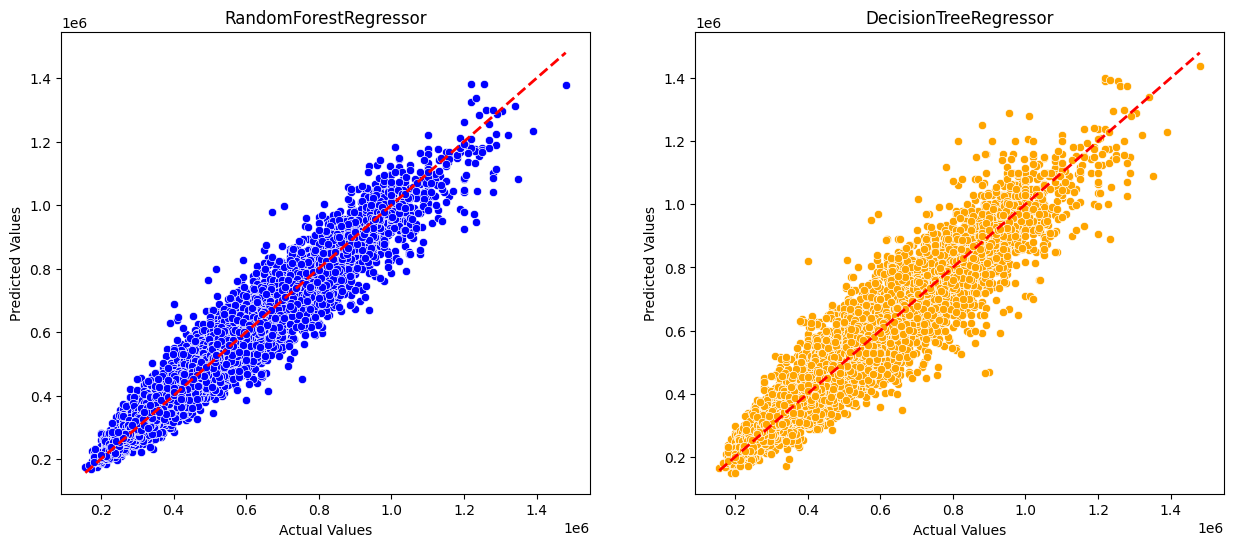

In [21]:
# Creating subplots for side-by-side comparison of regression model predictions

fig , ax = plt.subplots(1,2, figsize=(15,6))

# Subplot 1: RandomForestRegressor
sns.scatterplot(x=y_test, y=rf_test_pred, color='blue', ax=ax[0])
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
                          linestyle='--', color='r', linewidth=2)
ax[0].set_xlabel('Actual Values')
ax[0].set_ylabel('Predicted Values')
ax[0].set_title('RandomForestRegressor')

# Subplot 3: DecisionTreeRegressor
sns.scatterplot(x=y_test, y=dt_test_pred, color='orange', ax=ax[1])
ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
                          linestyle='--', color='r', linewidth=2)
ax[1].set_xlabel('Actual Values')
ax[1].set_ylabel('Predicted Values')
ax[1].set_title('DecisionTreeRegressor')

# Displaying the subplots
plt.show()

### Testing

In [ ]:
user_data = pd.Series()
user_data['town'] = 'PUNGGOL'
user_data['flat_type'] = '4 ROOM'
user_data['storey_range'] = 'Mid_Rise_Building'
user_data['floor_area_sqm'] = 93
user_data['flat_model'] = 'Model A'
user_data['flat_age_months'] = 60
user_data['lease_exp'] = 1076

print(model_rf.predict(X=pd.DataFrame([user_data])))

[575034.45943978]


In [ ]:
# Decision Tree prediction
print(model_dt.predict(X=pd.DataFrame([user_data])))

[574788.8]


In [ ]:
# save the RandomForestRegressor ML model using pickel
import pickle
with open('singapore_house_resale_price_prediction.pkl','wb') as f:
    pickle.dump(model_rf, f)

In [ ]:
# loading the model to predict
with open('singapore_house_resale_price_prediction.pkl', 'rb') as f:
    model_house = pickle.load(f)

In [ ]:
# Predict the response  with user data
user_data = pd.Series()
user_data['town'] = 'PUNGGOL'
user_data['flat_type'] = '4 ROOM'
user_data['storey_range'] = 'Mid_Rise_Building'
user_data['floor_area_sqm'] = 93
user_data['flat_model'] = 'Model A'
user_data['flat_age_months'] = 60
user_data['lease_exp'] = 1076

print(model_house.predict(X=pd.DataFrame([user_data])))


[575034.45943978]
